# Bay Area Bike Share Analyst

## Data description

In [1]:
# import the necessary library
import csv
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

We already have 2 csv file in 
- station_data.csv
  - Trip ID: numeric ID of bike trip
  - Duration: time of trip in seconds
  - Start Date: start date of trip with date and time, in PST
  - Start Station: station name of start station
Start Terminal: numeric reference for start station
-End Date: end date of trip with date and time, in PST
-End Station: station name for end station
-End Terminal: numeric reference for end station
-Bike #: ID of bike used
-Subscription Type: Subscriber = annual member; Customer = 24-hour or 3-day member
-Zip Code: Home zip code of user (only available for annual members)
- trip_data.csv

Let do some code to do EDA to these file


In [2]:
# define 2 variable to save the path file
station_data = 'Database/station_data.csv'
trip_data = 'Database/trip_data.csv'

Now take a look with station_data

In [3]:
station = pd.read_csv(station_data)
station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [4]:
station.tail()

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [5]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    69 non-null     int64  
 1   name          69 non-null     object 
 2   lat           69 non-null     float64
 3   long          69 non-null     float64
 4   dockcount     69 non-null     int64  
 5   landmark      69 non-null     object 
 6   installation  69 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [6]:
station.nunique()

station_id      69
name            69
lat             68
long            69
dockcount        6
landmark         5
installation    16
dtype: int64

In [7]:
station.isnull().sum()

station_id      0
name            0
lat             0
long            0
dockcount       0
landmark        0
installation    0
dtype: int64

In [8]:
station.describe()

,station_id,lat,long,dockcount
count,69.000000,69.000000,69.000000,69.000000
mean,42.405797,37.593840,-122.223453,17.695652
std,23.822455,0.202682,0.207269,4.026765
min,2.000000,37.329732,-122.418954,11.000000
25%,24.000000,37.390277,-122.400811,15.000000
50%,42.000000,37.771058,-122.388013,15.000000
75%,63.000000,37.788446,-122.081896,19.000000
max,83.000000,37.804770,-121.877349,27.000000


Now take a look with trip_data

In [9]:
trip = pd.read_csv(trip_data)
trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [10]:
trip.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
144010,198771,385,2/28/2014 22:15,Powell Street BART,39,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404
144011,198772,145,2/28/2014 22:38,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111
144012,198773,677,2/28/2014 22:45,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102
144013,198774,64128,2/28/2014 23:01,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124
144014,198775,570,2/28/2014 23:20,2nd at South Park,64,2/28/2014 23:30,Townsend at 7th,65,577,Subscriber,94107


In [11]:
trip.isnull().sum()

Trip ID                 0
Duration                0
Start Date              0
Start Station           0
Start Terminal          0
End Date                0
End Station             0
End Terminal            0
Bike #                  0
Subscription Type       0
Zip Code             6130
dtype: int64

In [12]:
trip.nunique()

Trip ID              144015
Duration               7983
Start Date            86444
Start Station            69
Start Terminal           69
End Date              85240
End Station              69
End Terminal             69
Bike #                  689
Subscription Type         2
Zip Code               2880
dtype: int64

In [13]:
trip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Trip ID            144015 non-null  int64 
 1   Duration           144015 non-null  int64 
 2   Start Date         144015 non-null  object
 3   Start Station      144015 non-null  object
 4   Start Terminal     144015 non-null  int64 
 5   End Date           144015 non-null  object
 6   End Station        144015 non-null  object
 7   End Terminal       144015 non-null  int64 
 8   Bike #             144015 non-null  int64 
 9   Subscription Type  144015 non-null  object
 10  Zip Code           137885 non-null  object
dtypes: int64(5), object(6)
memory usage: 12.1+ MB


In [14]:
# summarise data from trip_data and write it into a new file
import function_help
trip_summarised_data = 'Database/trip_summarised.csv'
function_help.summarise_data(trip_data,station_data,trip_summarised= trip_summarised_data)

function_help.call_summarise_func()
trip_summarised = pd.read_csv(trip_summarised_data)
trip_summarised.head()


,tripID,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,4576,1.050000,2013-08-29,2013,8,14,Thursday,San Francisco,San Francisco,Subscriber
1,4607,1.166667,2013-08-29,2013,8,14,Thursday,San Jose,San Jose,Subscriber
2,4130,1.183333,2013-08-29,2013,8,10,Thursday,Mountain View,Mountain View,Subscriber
3,4251,1.283333,2013-08-29,2013,8,11,Thursday,San Jose,San Jose,Subscriber
4,4299,1.383333,2013-08-29,2013,8,12,Thursday,San Francisco,San Francisco,Subscriber


In [15]:
trip_summarised.tail()

,tripID,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
144010,198771,6.416667,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
144011,198772,2.416667,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
144012,198773,11.283333,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
144013,198774,1068.800000,2014-02-28,2014,2,23,Friday,San Francisco,San Francisco,Customer
144014,198775,9.500000,2014-02-28,2014,2,23,Friday,San Francisco,San Francisco,Subscriber


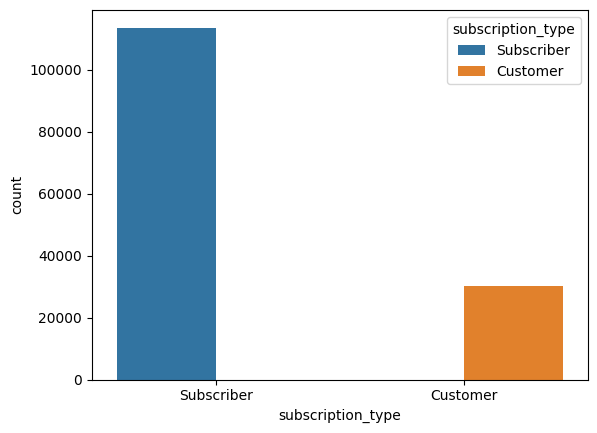

In [16]:
sns.countplot(x = trip_summarised['subscription_type'],hue = trip_summarised['subscription_type'])
plt.show()

In [17]:
#sns.countplot( x = trip_summarised['duration'])

In [18]:
import statistics

In [19]:
duration_statistics= pd.DataFrame({'Average': statistics.mean(trip_summarised['duration']),
'Median':statistics.median_low(trip_summarised['duration']),
' Multi mode':statistics.multimode(trip_summarised['duration']),
 })
duration_statistics

,Average,Median,Multi mode
0,20.515169,8.85,6.05


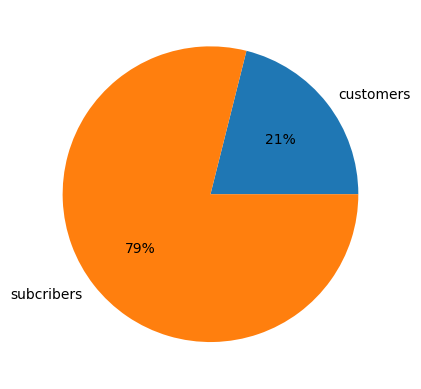

In [20]:
# pie chart of subscription_type
# Subcriber and Customer
#print((trip_summarised['subscription_type'] == "Subscriber").count())
customer_num = (trip_summarised[trip_summarised['subscription_type'] == "Customer"]['tripID']).count()
subscriber_num = (trip_summarised[trip_summarised['subscription_type'] == "Subscriber"]['tripID']).count()

plt.pie(np.array([customer_num,subscriber_num]), labels = ["customers",'subcribers'],autopct='%.0f%%')
plt.show()

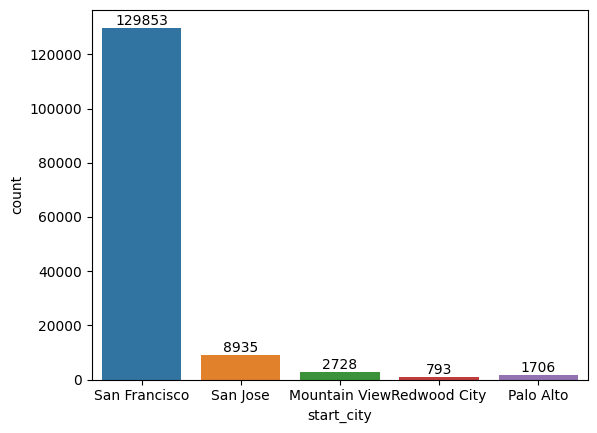

In [21]:
ax = sns.countplot(x=trip_summarised["start_city"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

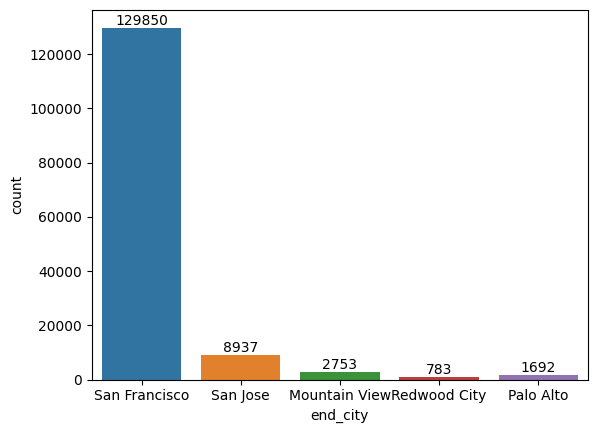

In [22]:
ax = sns.countplot(x=trip_summarised["end_city"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

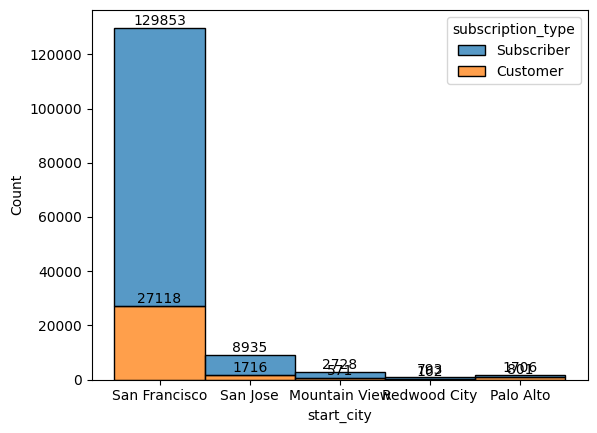

In [23]:
ax = sns.histplot(data=trip_summarised, x="start_city", hue="subscription_type", multiple="stack")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19800\2941436829.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


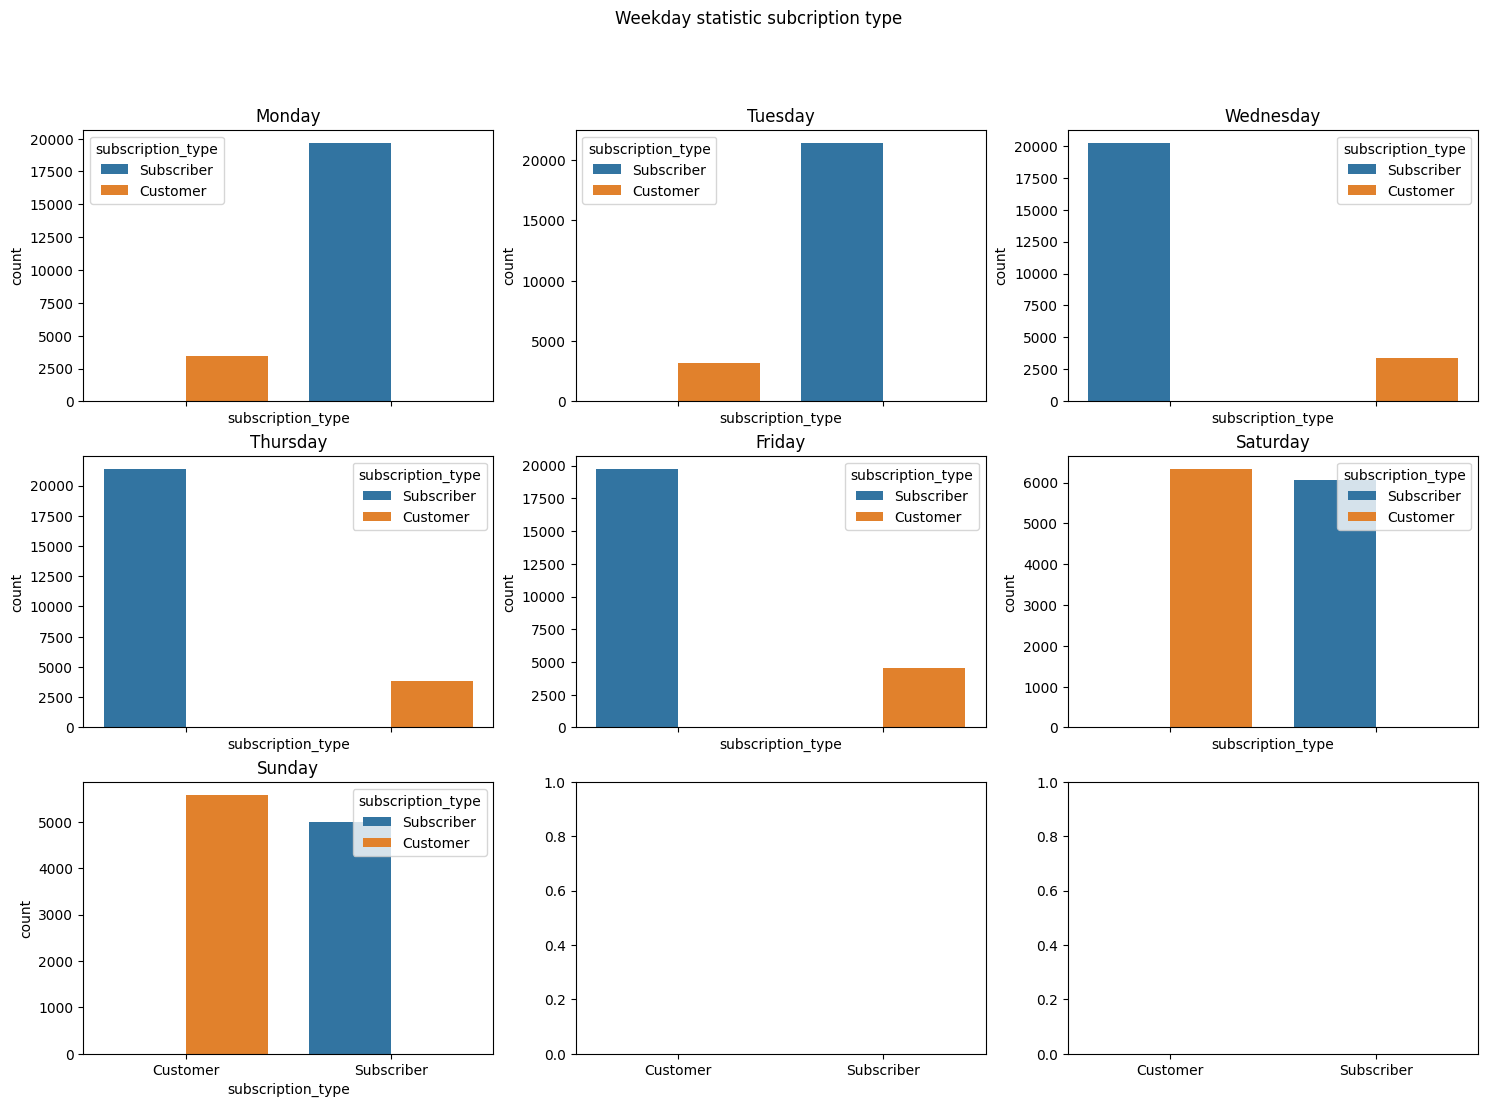

In [24]:
fig, ax = plt.subplots(3,3,sharex=True,figsize=(18, 12))
fig.suptitle('Weekday statistic subcription type')
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Monday"),hue = trip_summarised['subscription_type'],ax= ax[0][0])
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Tuesday"),hue = trip_summarised['subscription_type'],ax= ax[0][1])
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Wednesday"),hue = trip_summarised['subscription_type'],ax= ax[0][2])
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Thursday"),hue = trip_summarised['subscription_type'],ax= ax[1][0])
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Friday"),hue = trip_summarised['subscription_type'],ax= ax[1][1])
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Saturday"),hue = trip_summarised['subscription_type'],ax= ax[1][2])
sns.countplot(x = trip_summarised['subscription_type'].where(trip_summarised['weekday'] == "Sunday"),hue = trip_summarised['subscription_type'],ax= ax[2][0])
ax[0][0].set_title("Monday")
ax[0][1].set_title("Tuesday")
ax[0][2].set_title("Wednesday")
ax[1][0].set_title("Thursday")
ax[1][1].set_title("Friday")
ax[1][2].set_title("Saturday")
ax[2][0].set_title("Sunday")
fig.show()

{'Monday': 23138, 'Tuesday': 24678, 'Wednesday': 23651, 'Thursday': 25265, 'Friday': 24283, 'Saturday': 12413, 'Sunday': 10587}


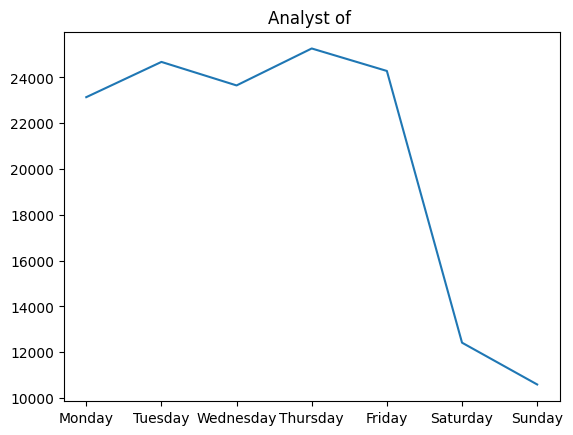

In [25]:
weekdays = ["Monday",
"Tuesday",
"Wednesday",
"Thursday",
"Friday",
"Saturday",
"Sunday"]
weekday_data = {}
for weekday in weekdays:
    weekday_data[weekday] = trip_summarised['tripID'].where(trip_summarised['weekday'] == weekday).count()
print(weekday_data)
sns.lineplot(data = weekday_data).set(title = "Analyst of ")
plt.show()

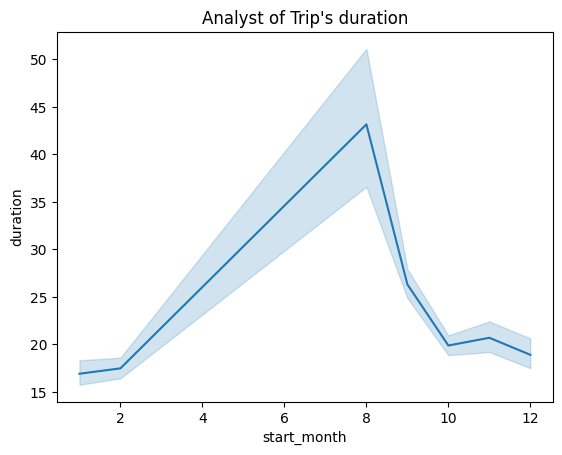

In [26]:
sns.lineplot(data = trip_summarised, x = 'start_month',y =  'duration').set(title = "Analyst of Trip's duration")
plt.show() 

In [27]:
months = [i for i in range(1,13)]
print(months)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
